In [22]:
import pandas as pd

# CSV 파일 읽기
file_name = "car_evaluation.csv"  # 실제 파일명 사용
data = pd.read_csv(file_name, header=None)

# 열 이름 지정
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

from sklearn.preprocessing import LabelEncoder

# 모든 열에 대해 LabelEncoder 적용
label_encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 변환된 데이터 출력
print(data)

      buying  maint  doors  persons  lug_boot  safety  class
0          3      3      0        0         2       1      2
1          3      3      0        0         2       2      2
2          3      3      0        0         2       0      2
3          3      3      0        0         1       1      2
4          3      3      0        0         1       2      2
...      ...    ...    ...      ...       ...     ...    ...
1723       1      1      3        2         1       2      1
1724       1      1      3        2         1       0      3
1725       1      1      3        2         0       1      2
1726       1      1      3        2         0       2      1
1727       1      1      3        2         0       0      3

[1728 rows x 7 columns]


In [10]:
from sklearn.model_selection import train_test_split

# 입력 데이터(X)와 출력 데이터(y) 분리
X = data.drop(columns=['class'])
y = data['class']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 확인
print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)


학습 데이터 크기: (1382, 6)
테스트 데이터 크기: (346, 6)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 의사결정트리 모델 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# 랜덤포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# 결과 출력
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Decision Tree Accuracy: 0.9739884393063584
Random Forest Accuracy: 0.9739884393063584


In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 트리 시각화
plt.figure(figsize=(100, 100))
plot_tree(
    dt_model,                     # 의사결정트리 모델
    feature_names=X.columns,      # 특성 이름
    class_names=label_encoders['class'].classes_,  # 클래스 이름
    filled=True,                  # 색상으로 클래스 구분
    rounded=True,                 # 둥근 노드
    fontsize=12                   # 폰트 크기
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

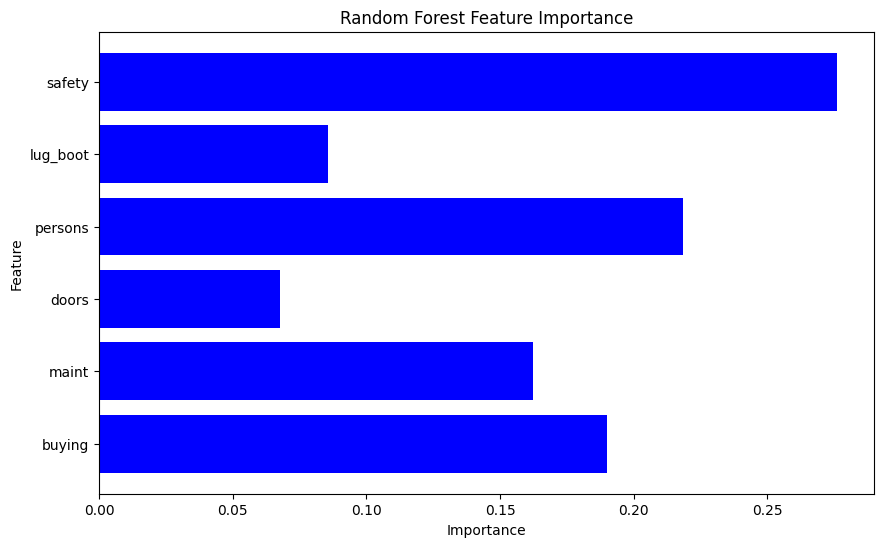

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 랜덤포레스트 모델의 특성 중요도 계산
feature_importances = rf_model.feature_importances_

# 특성 중요도를 막대그래프 형태로 시각화
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()
